In [13]:
import os
import re
import cv2
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
sns.set_style("whitegrid")
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings('ignore')
import xml.etree.ElementTree as ET
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.model_selection import train_test_split
print("Hello")

Hello


In [15]:
cwd = os.getcwd()

In [16]:
print(cwd)

C:\Users\mannu\X-RayCaptioningProject


In [32]:
import matplotlib.pyplot as plt
print("Hello")

Hello


    copying pandas\tests\test_config.py -> build\lib.win-amd64-3.9\pandas\tests
    copying pandas\tests\test_downstream.py -> build\lib.win-amd64-3.9\pandas\tests
    copying pandas\tests\test_errors.py -> build\lib.win-amd64-3.9\pandas\tests
    copying pandas\tests\test_expressions.py -> build\lib.win-amd64-3.9\pandas\tests
    copying pandas\tests\test_join.py -> build\lib.win-amd64-3.9\pandas\tests
    copying pandas\tests\test_lib.py -> build\lib.win-amd64-3.9\pandas\tests
    copying pandas\tests\test_multilevel.py -> build\lib.win-amd64-3.9\pandas\tests
    copying pandas\tests\test_nanops.py -> build\lib.win-amd64-3.9\pandas\tests
    copying pandas\tests\test_panel.py -> build\lib.win-amd64-3.9\pandas\tests
    copying pandas\tests\test_register_accessor.py -> build\lib.win-amd64-3.9\pandas\tests
    copying pandas\tests\test_sorting.py -> build\lib.win-amd64-3.9\pandas\tests
    copying pandas\tests\test_strings.py -> build\lib.win-amd64-3.9\pandas\tests
    copying pandas\t

    copying pandas\tests\extension\test_datetime.py -> build\lib.win-amd64-3.9\pandas\tests\extension
    copying pandas\tests\extension\test_external_block.py -> build\lib.win-amd64-3.9\pandas\tests\extension
    copying pandas\tests\extension\test_integer.py -> build\lib.win-amd64-3.9\pandas\tests\extension
    copying pandas\tests\extension\test_interval.py -> build\lib.win-amd64-3.9\pandas\tests\extension
    copying pandas\tests\extension\test_period.py -> build\lib.win-amd64-3.9\pandas\tests\extension
    copying pandas\tests\extension\test_sparse.py -> build\lib.win-amd64-3.9\pandas\tests\extension
    copying pandas\tests\extension\__init__.py -> build\lib.win-amd64-3.9\pandas\tests\extension
    creating build\lib.win-amd64-3.9\pandas\tests\frame
    copying pandas\tests\frame\common.py -> build\lib.win-amd64-3.9\pandas\tests\frame
    copying pandas\tests\frame\conftest.py -> build\lib.win-amd64-3.9\pandas\tests\frame
    copying pandas\tests\frame\test_alter_axes.py -> build

    copying pandas\tests\tseries\__init__.py -> build\lib.win-amd64-3.9\pandas\tests\tseries
    creating build\lib.win-amd64-3.9\pandas\tests\tslibs
    copying pandas\tests\tslibs\test_api.py -> build\lib.win-amd64-3.9\pandas\tests\tslibs
    copying pandas\tests\tslibs\test_array_to_datetime.py -> build\lib.win-amd64-3.9\pandas\tests\tslibs
    copying pandas\tests\tslibs\test_ccalendar.py -> build\lib.win-amd64-3.9\pandas\tests\tslibs
    copying pandas\tests\tslibs\test_conversion.py -> build\lib.win-amd64-3.9\pandas\tests\tslibs
    copying pandas\tests\tslibs\test_libfrequencies.py -> build\lib.win-amd64-3.9\pandas\tests\tslibs
    copying pandas\tests\tslibs\test_liboffsets.py -> build\lib.win-amd64-3.9\pandas\tests\tslibs
    copying pandas\tests\tslibs\test_normalize_date.py -> build\lib.win-amd64-3.9\pandas\tests\tslibs
    copying pandas\tests\tslibs\test_parse_iso8601.py -> build\lib.win-amd64-3.9\pandas\tests\tslibs
    copying pandas\tests\tslibs\test_parsing.py -> build

In [17]:
import tarfile
images = tarfile.open('NLMCXR_png.tgz')
images.extractall(cwd+'/images/')

In [ ]:
xml = tarfile.open('NLMCXR_reports.tgz')
xml.extractall(cwd+'/reports/')
print("Done")

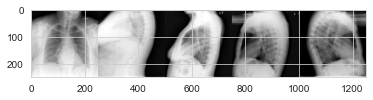

In [35]:
#print 5 sample images
img_lst=[]
for i in range(0,5): 
  k = np.random.choice(range(len(os.listdir('images'))))
  image_file = os.listdir('images')[k]
  #getting an image file
  img = cv2.imread(os.path.join('images',image_file))
  img = cv2.resize(img, (250, 250))
  img_lst.append(img)
img_lst = np.hstack(img_lst)
plt.imshow(img_lst)

In [36]:
with open("reports/ecgen-radiology/1.xml", 'r') as f:
    print(f.read())

<?xml version="1.0" encoding="utf-8"?>
<eCitation>
   <meta type="rr"/>
   <uId id="CXR1"/>
   <pmcId id="1"/>
   <docSource>CXR</docSource>
   <IUXRId id="1"/>
   <licenseType>open-access</licenseType>
   <licenseURL>http://creativecommons.org/licenses/by-nc-nd/4.0/</licenseURL>
   <ccLicense>byncnd</ccLicense>
   <articleURL/>
   <articleDate>2013-08-01</articleDate>
   <articleType>XR</articleType>
   <publisher>Indiana University</publisher>
   <title>Indiana University Chest X-ray Collection</title>
   <note>The data are drawn from multiple hospital systems.</note>
   <specialty>pulmonary diseases</specialty>
   <subset>CXR</subset>
   <MedlineCitation Owner="Indiana University" Status="supplied by publisher">
   
      <Article PubModel="Electronic">
      
         <Journal>
         
            <JournalIssue>
            
               <PubDate>
               
                  <Year>2013</Year>
               
                  <Month>08</Month>
               
            

In [37]:

print('Total Images in data : ', len(os.listdir('images')))
print('Total Reports in data : ', len(os.listdir('reports/ecgen-radiology')))

Total Images in data :  7471
Total Reports in data :  3955


In [38]:
#list of count of images
img_count = [] 
for file in os.listdir('reports/ecgen-radiology'):
  xml_file = os.path.join('reports/ecgen-radiology',file)
  #reading the xml data
  with open(xml_file, 'r') as f:  
    data = f.read()
  #getting all the image names
  regex = r"parentImage id.*" 
  k  = re.findall(regex,data)
  temp = len(k)
  img_count.append(temp)

print("The max number of images associated with a report:",np.array(img_count).max())
print("The min number of images associated with a report:",np.array(img_count).min())

The max number of images associated with a report: 5
The min number of images associated with a report: 0


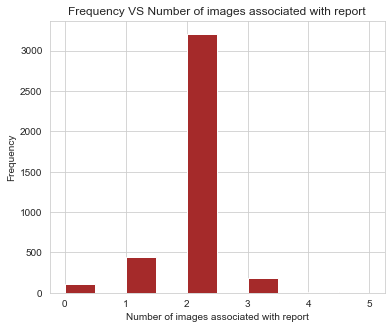

In [39]:
plt.figure(figsize = (6,5))
ax = pd.Series(img_count).plot(kind='hist',color='brown')
ax.set_xlabel('Number of images associated with report')
ax.set_title("Frequency VS Number of images associated with report")
plt.show()

In [40]:
print("Images per patient :\n")
print(pd.Series(img_count).value_counts())

Images per patient :

2    3208
1     446
3     181
0     104
4      15
5       1
dtype: int64


In [42]:
#Reference : https://stackoverflow.com/questions/2723015/how-to-find-recursively-for-a-tag-of-xml-using-lxml

columns = ["image_name", "image_caption", "comparison", "indication", "findings", "impression"]
dataframe = pd.DataFrame(columns = columns)
for file in tqdm(os.listdir('reports/ecgen-radiology/')):
    #find files with .xml extension only
    if file.endswith(".xml"):
        # finding root element 
        tree = ET.parse('reports/ecgen-radiology/'+file)#parse the xml file
        
        findings = tree.find(".//AbstractText[@Label='FINDINGS']").text
        indication = tree.find(".//AbstractText[@Label='INDICATION']").text
        comparision = tree.find(".//AbstractText[@Label='COMPARISON']").text
        impression = tree.find(".//AbstractText[@Label='IMPRESSION']").text

        caption = set()
        name_img = set()
        #find images in each parentImage tag
        for iterator in tree.findall("parentImage"):
            img = iterator.attrib['id']+".png"
            name_img.add(img)
            #add the corresponding report for each image
            caption.add('' if iterator.find('caption').text is None else iterator.find('caption').text)
            
        # add image details and reports to dataframe
        dataframe = dataframe.append(pd.Series([','.join(name_img), ','.join(caption), comparision, indication, findings, impression],
                                                         index = columns), ignore_index = True)

     

100%|█████████████████████████████████████████████████████████████████████████████| 3955/3955 [00:08<00:00, 456.06it/s]


In [43]:
dataframe.head()

,image_name,image_caption,comparison,indication,findings,impression
0,"CXR1_1_IM-0001-3001.png,CXR1_1_IM-0001-4001.png",Xray Chest PA and Lateral,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,"CXR10_IM-0002-2001.png,CXR10_IM-0002-1001.png",PA and lateral chest x-XXXX XXXX.,Chest radiographs XXXX.,"XXXX-year-old male, chest pain.",The cardiomediastinal silhouette is within nor...,No acute cardiopulmonary process.
2,"CXR100_IM-0002-1001.png,CXR100_IM-0002-2001.png","CHEST 2V FRONTAL/LATERAL XXXX, XXXX XXXX PM",None.,None,Both lungs are clear and expanded. Heart and m...,No active disease.
3,"CXR1000_IM-0003-1001.png,CXR1000_IM-0003-2001....",PA and lateral chest x-XXXX XXXX.,XXXX PA and lateral chest radiographs,"XXXX-year-old male, XXXX.",There is XXXX increased opacity within the rig...,1. Increased opacity in the right upper lobe w...
4,"CXR1001_IM-0004-1002.png,CXR1001_IM-0004-1001.png","CHEST 2V FRONTAL/LATERAL XXXX, XXXX XXXX PM",None,"dyspnea, subjective fevers, arthritis, immigra...",Interstitial markings are diffusely prominent ...,Diffuse fibrosis. No visible focal acute disease.


In [44]:
# Shape of the DataFrame
print('Shape of the Dataframe : ', dataframe.shape)

Shape of the Dataframe :  (3955, 6)


In [45]:
# function for obtaining the different information part of the xml report file and preprocessing them and also adding the concernced image and report information to the dataframe
def decontracted(phrase): #https://stackoverflow.com/a/47091490
  """
  performs text decontraction of words like won't to will not
  """
  # specific
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)

  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

In [46]:
def preprocess_text(data): #https://regex101.com/
  """
  extracts the information data from the xml file and does text preprocessing on them
  here info can be 1 value in this list ["COMPARISON","INDICATION","FINDINGS","IMPRESSION"]
  """
  preprocessed = []

  for sentence in tqdm(data.values):

    sentence = BeautifulSoup(sentence, 'lxml').get_text()

    regex = r"\d." 
    sentence = re.sub(regex,"",sentence) #removing all values like "1." and "2." etc

    regex = r"X+"
    sentence = re.sub(regex,"",sentence) #removing words like XXXX

    regex = r"[^.a-zA-Z]" 
    sentence = re.sub(regex," ",sentence) #removing all special characters except for full stop

    regex = r"http\S+"
    sentence = re.sub(regex,"", sentence)
    sentence = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?$%^&*'/+_]+", "", sentence)
    sentence = re.sub('&', 'and',sentence)
    sentence = re.sub('@', 'at',sentence)
    sentence = re.sub('0', 'zero',sentence)
    sentence = re.sub('1', 'one',sentence)
    sentence = re.sub('2', 'two',sentence)
    sentence = re.sub('3', 'three',sentence)
    sentence = re.sub('4', 'four',sentence)
    sentence = re.sub('5', 'five',sentence)
    sentence = re.sub('6', 'six',sentence)
    sentence = re.sub('7', 'seven',sentence)
    sentence = re.sub('8', 'eight',sentence)
    sentence = re.sub('9', 'nine',sentence)
    sentence = re.sub('year old', "", sentence)#Occur multiple times in Indication feature but not necessary     
    sentence = re.sub('yearold', "", sentence)
    sentence = decontracted(sentence) #perform decontraction
    sentence = sentence.strip().lower() #strips the begining and end of the string of spaces and converts all into lowercase
    sentence = " ".join(sentence.split()) #removes unwanted spaces
    if sentence=="": #if the resulting sentence is an empty string return null value
      sentence = np.nan
    preprocessed.append(sentence)
  return preprocessed

In [47]:
#Check for Null values in Text columns
NaN = dataframe.isnull().sum()
print("Total Nan Values in caption columns -",NaN[1])
print("Total Nan Values in comparison columns -",NaN[2])
print("Total Nan Values in Indication columns -",NaN[3])
print("Total Nan Values in findings columns   -",NaN[4])
print("Total Nan Values in Impression columns -",NaN[5])

Total Nan Values in caption columns - 0
Total Nan Values in comparison columns - 622
Total Nan Values in Indication columns - 90
Total Nan Values in findings columns   - 530
Total Nan Values in Impression columns - 34


In [48]:
#Replacing the nan values
dataframe['image_caption'] = dataframe['image_caption'].fillna('Unknown')
dataframe['comparison'] = dataframe['comparison'].fillna('No Comparison')
dataframe['indication'] = dataframe['indication'].fillna('No Indication')
dataframe['findings'] = dataframe['findings'].fillna('No Findings')
dataframe['impression'] = dataframe['impression'].fillna('No Impression')

In [49]:
#Check for Null values in Text columns
NaN = dataframe.isnull().sum()
print("Total Nan Values in caption columns -",NaN[1])
print("Total Nan Values in comparison columns -",NaN[2])
print("Total Nan Values in Indication columns -",NaN[3])
print("Total Nan Values in findings columns   -",NaN[4])
print("Total Nan Values in Impression columns -",NaN[5])

Total Nan Values in caption columns - 0
Total Nan Values in comparison columns - 0
Total Nan Values in Indication columns - 0
Total Nan Values in findings columns   - 0
Total Nan Values in Impression columns - 0


In [50]:
#Preprocessing of text features
dataframe['image_caption'] = preprocess_text(dataframe['image_caption'])
dataframe['comparison'] = preprocess_text(dataframe['comparison'])
dataframe['indication'] = preprocess_text(dataframe['indication'])
dataframe['findings'] = preprocess_text(dataframe['findings'])
dataframe['impression'] = preprocess_text(dataframe['impression'])

100%|████████████████████████████████████████████████████████████████████████████| 3955/3955 [00:00<00:00, 5033.58it/s]


In [51]:
dataframe.head()

,image_name,image_caption,comparison,indication,findings,impression
0,"CXR1_1_IM-0001-3001.png,CXR1_1_IM-0001-4001.png",ray chest pa and lateral,none,positive tb test,the cardiac silhouette and mediastinum size ar...,normal chest x
1,"CXR10_IM-0002-2001.png,CXR10_IM-0002-1001.png",pa and lateral chest x,chest radiographs,male chest pain,the cardiomediastinal silhouette is within nor...,no acute cardiopulmonary process
2,"CXR100_IM-0002-1001.png,CXR100_IM-0002-2001.png",chest frontal lateral pm,none,no indication,both lungs are clear and expanded heart and me...,no active disease
3,"CXR1000_IM-0003-1001.png,CXR1000_IM-0003-2001....",pa and lateral chest x,pa and lateral chest radiographs,male,there is increased opacity within the right up...,increased opacity in the right upper lobe with...
4,"CXR1001_IM-0004-1002.png,CXR1001_IM-0004-1001.png",chest frontal lateral pm,none,dyspnea subjective fevers arthritis immigrant ...,interstitial markings are diffusely prominent ...,diffuse fibrosis no visible focal acute disease


In [54]:
dataframe.replace("", float("NaN"), inplace=True)

In [55]:
print(dataframe.isnull().sum()*100/dataframe.shape[0] )

image_name        2.629583
image_caption     2.680152
comparison       20.960809
indication        5.638432
findings          0.025284
impression        0.000000
dtype: float64


In [56]:
dataframe.dropna(subset = ["image_name"], inplace=True)
dataframe.shape

(3851, 6)

In [57]:
dataframe.head()


,image_name,image_caption,comparison,indication,findings,impression
0,"CXR1_1_IM-0001-3001.png,CXR1_1_IM-0001-4001.png",ray chest pa and lateral,none,positive tb test,the cardiac silhouette and mediastinum size ar...,normal chest x
1,"CXR10_IM-0002-2001.png,CXR10_IM-0002-1001.png",pa and lateral chest x,chest radiographs,male chest pain,the cardiomediastinal silhouette is within nor...,no acute cardiopulmonary process
2,"CXR100_IM-0002-1001.png,CXR100_IM-0002-2001.png",chest frontal lateral pm,none,no indication,both lungs are clear and expanded heart and me...,no active disease
3,"CXR1000_IM-0003-1001.png,CXR1000_IM-0003-2001....",pa and lateral chest x,pa and lateral chest radiographs,male,there is increased opacity within the right up...,increased opacity in the right upper lobe with...
4,"CXR1001_IM-0004-1002.png,CXR1001_IM-0004-1001.png",chest frontal lateral pm,none,dyspnea subjective fevers arthritis immigrant ...,interstitial markings are diffusely prominent ...,diffuse fibrosis no visible focal acute disease


In [58]:
dataframe['image_count'] = dataframe['image_name'].astype(str).str.split(',').apply(len)


In [59]:
#Adding word count feature for indication, findings and impression
dataframe['indication_count'] = dataframe['indication'].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
dataframe['findings_count'] = dataframe['findings'].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
dataframe['impression_count'] = dataframe['impression'].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
dataframe.head()

,image_name,image_caption,comparison,indication,findings,impression,image_count,indication_count,findings_count,impression_count
0,"CXR1_1_IM-0001-3001.png,CXR1_1_IM-0001-4001.png",ray chest pa and lateral,none,positive tb test,the cardiac silhouette and mediastinum size ar...,normal chest x,2,3,33,3
1,"CXR10_IM-0002-2001.png,CXR10_IM-0002-1001.png",pa and lateral chest x,chest radiographs,male chest pain,the cardiomediastinal silhouette is within nor...,no acute cardiopulmonary process,2,3,38,4
2,"CXR100_IM-0002-1001.png,CXR100_IM-0002-2001.png",chest frontal lateral pm,none,no indication,both lungs are clear and expanded heart and me...,no active disease,2,2,10,3
3,"CXR1000_IM-0003-1001.png,CXR1000_IM-0003-2001....",pa and lateral chest x,pa and lateral chest radiographs,male,there is increased opacity within the right up...,increased opacity in the right upper lobe with...,3,1,52,36
4,"CXR1001_IM-0004-1002.png,CXR1001_IM-0004-1001.png",chest frontal lateral pm,none,dyspnea subjective fevers arthritis immigrant ...,interstitial markings are diffusely prominent ...,diffuse fibrosis no visible focal acute disease,2,7,14,7


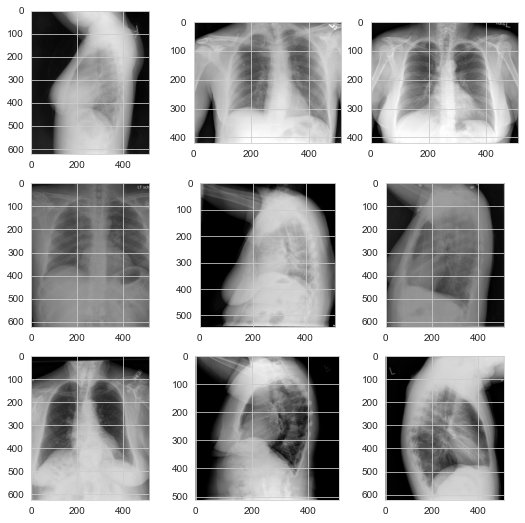

In [61]:
#Displaying sample 9 patient X-Ray
fig, axs = plt.subplots(3, 3, figsize = (9,9))
ax = axs.flatten()
for df, figure in zip(dataframe[0:10].itertuples(), ax):
    image=mpimg.imread("images/"+df.image_name.split(',')[0])
    figure.imshow(image)
plt.show()

In [65]:
def show_image_captions(df,sample):
    '''This function prints the sample images and its other text features.
       Parameters :
       - df: dataframe
       - sample: Number of datapoints'''
    
    sampled_row = df.sample(sample)

    for count, row in sampled_row.iterrows():
        print("Caption :",row['image_caption'])
        imgs = row["image_name"].split(',')
        fig, axs = plt.subplots(1, len(imgs), figsize = (10,10))
        iterator = 0

        for img, figure in zip(imgs, axs.flat):
            image= mpimg.imread("images/"+img)
            imgplot = axs[iterator].imshow(image)
            iterator +=1
        
        plt.show()
        print("\nComparision :",row.get('comparision'))
        print("\nIndication :",row.get('indication'))
        print("\nFindings :",row.get('findings'))
        print("\nImpression :",row.get('impression'))
        print("="*100,'\n')

Caption : portable chest at hours


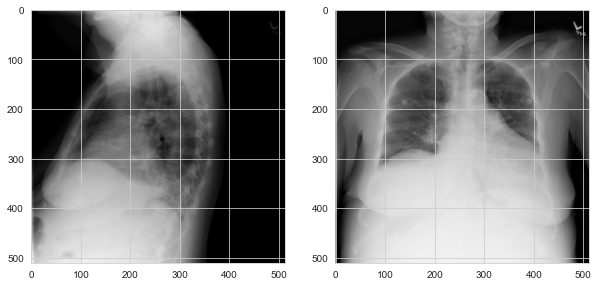


Comparision : None

Indication : possible syncope

Findings : no findings

Impression : mild cardiomegaly densely calcified aorta prominence of the pulmonary outflow and most indicates enlarged pulmonary arteries and raise concern for pulmonary artery hypertension there is no overt edema the right diaphragm is elevated there are small right and left pleural effusions no pneumothorax

Caption : views chest hours


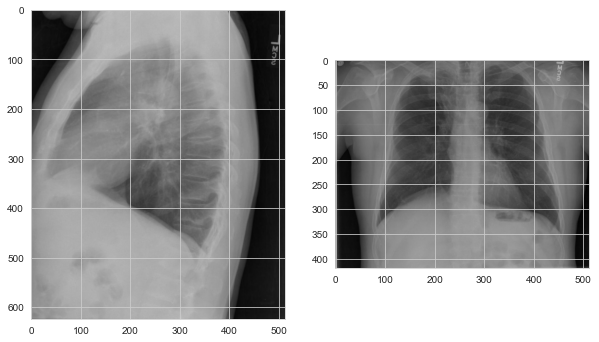


Comparision : None

Indication : chest pain

Findings : heart size and mediastinal contours are unchanged stable right upper lobe scarring with pleural thickening no consolidation no visible pleural effusion or pneumothorax

Impression : stable chest no acute cardiopulmonary abnormality



In [66]:
#showing sample 2 datapoints
show_image_captions(dataframe, 2)

In [67]:
dataframe.to_csv("data.csv", index=False)
print("Done")

Done


In [68]:
dataframe = pd.read_csv('data.csv')

In [69]:
k = dataframe.loc[(dataframe.comparison == 'none') | (dataframe.comparison == 'no comparison')]
print("Number of rows with no informnation in comparision label:",k.shape[0])

Number of rows with no informnation in comparision label: 2005


In [70]:
def unique_words_features(df):
    '''This function takes pandas dataframe and show barplot of features unique and repeated words 
       Input  =  pandas dataframe or numpy arrays
       Output =  barplot of the unique words of dataframe '''

    #length of the feature
    len_total = len(df.tolist())

    #length of unique words in the featue
    len_unique = len(np.unique(df.tolist()))

    x = ['Total Values', 'Unique Values']
    y =  [len_total, len_unique]

    plt.bar(x,y,color = 'Teal')
    plt.ylabel('Word-Count')
    for index,data in enumerate(y):
        plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
    
    plt.ylabel('Word-Count')
     

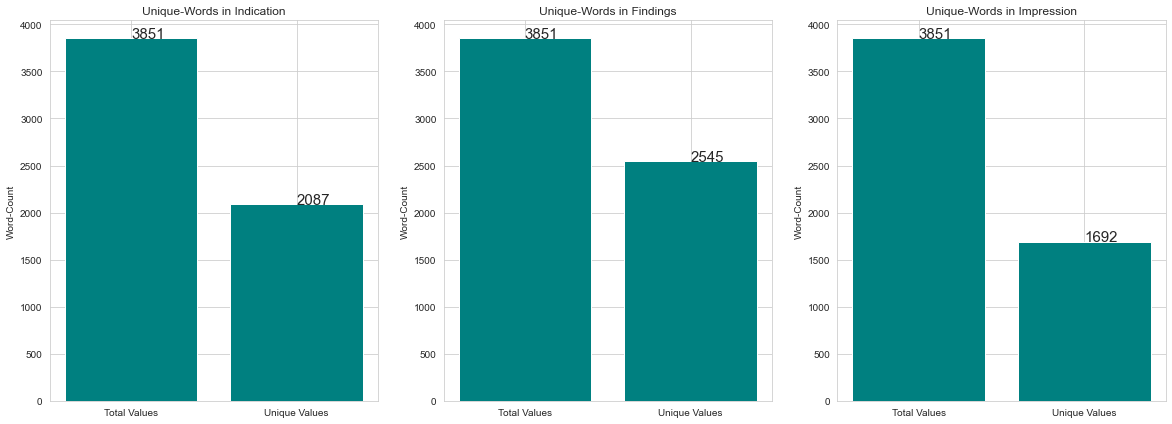

In [71]:
plt.figure(figsize = (20,7))
plt.subplot(131)
unique_words_features(dataframe['indication'])
plt.title('Unique-Words in Indication')
plt.subplot(132)
unique_words_features(dataframe['findings'])
plt.title('Unique-Words in Findings')
plt.subplot(133)
unique_words_features(dataframe['impression'])
plt.title('Unique-Words in Impression')
plt.show()

In [72]:
#Printing min,max and median of word_count
print("Maximum number of word count for Indication is:",np.max(dataframe.indication_count.values))
print("Minimum number of word count for Indication is:",np.min(dataframe.indication_count.values))
print("median number of word count for Indication is:",np.median(dataframe.indication_count.values))

Maximum number of word count for Indication is: 32
Minimum number of word count for Indication is: 1
median number of word count for Indication is: 3.0


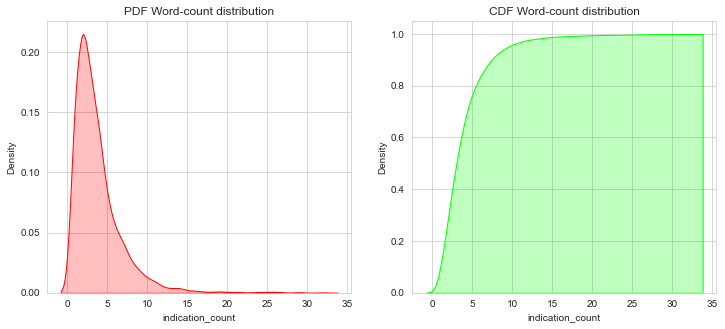

In [73]:
#Plotting PDF and CDF for word_count distribution of Indication feature
plt.figure(figsize = (12,5))
# Seaborn PDF
plt.subplot(121)
sns.kdeplot(dataframe['indication_count'],shade=True,color='Red')
plt.title("PDF Word-count distribution")
plt.subplot(122)
# Seaborn CDF
sns.distplot(dataframe['indication_count'], kde_kws={'cumulative': True,'shade': True}, hist=False,color='Lime')
plt.title("CDF Word-count distribution")
plt.show()

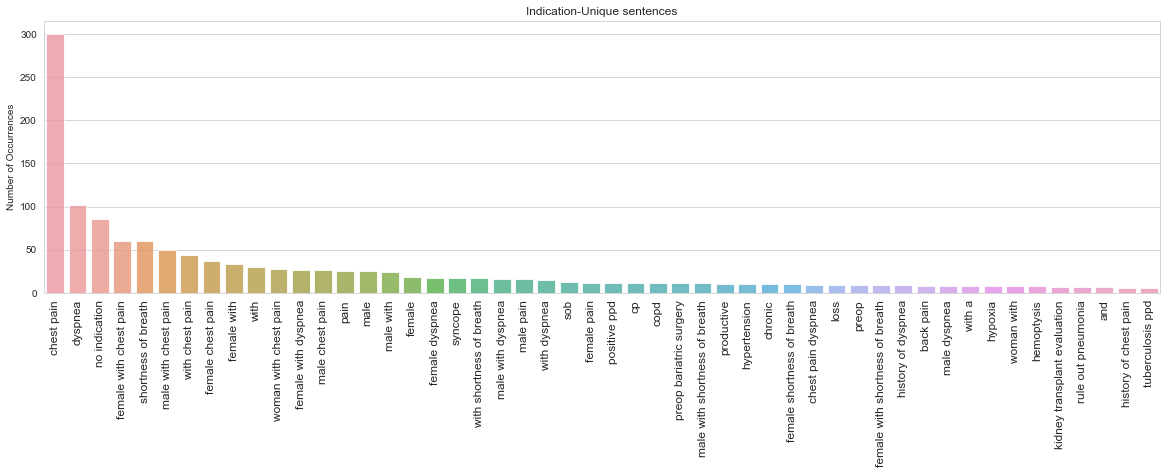

In [74]:
#Plotting top 50 frequent sentences of Indication feature
sentences = dataframe['indication'].value_counts()[:50]
plt.figure(figsize=(20,5))
sns.barplot(sentences.index, sentences.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xticks(fontsize='large',rotation=90)
plt.title("Indication-Unique sentences")
plt.show()

In [76]:
#Printing min,max and median of word_count
print("Maximum number of word count for finding is:",np.max(dataframe.findings_count.values))
print("Minimum number of word count for finding is:",np.min(dataframe.findings_count.values))
print("Median number of word count for finding is:",np.median(dataframe.findings_count.values))

Maximum number of word count for finding is: 166
Minimum number of word count for finding is: 1
Median number of word count for finding is: 26.0


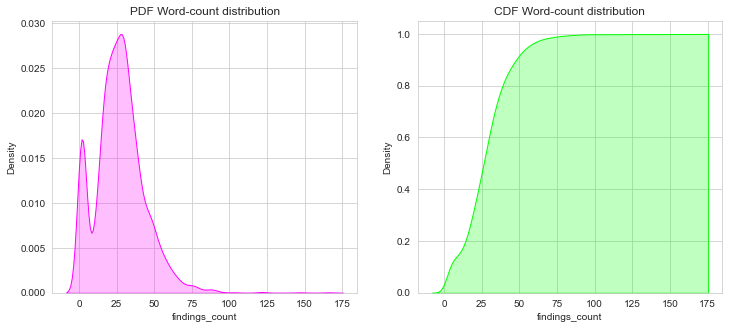

In [77]:
#Plotting the PDF for word_count distribution of Findings feature
plt.figure(figsize = (12,5))
# Seaborn PDF
plt.subplot(121)
sns.kdeplot(dataframe['findings_count'],shade=True,color='Magenta')
plt.title("PDF Word-count distribution")
plt.subplot(122)
# Seaborn CDF
sns.distplot(dataframe['findings_count'], kde_kws={'cumulative': True,'shade': True}, hist=False,color='Lime')
plt.title("CDF Word-count distribution")
plt.show()

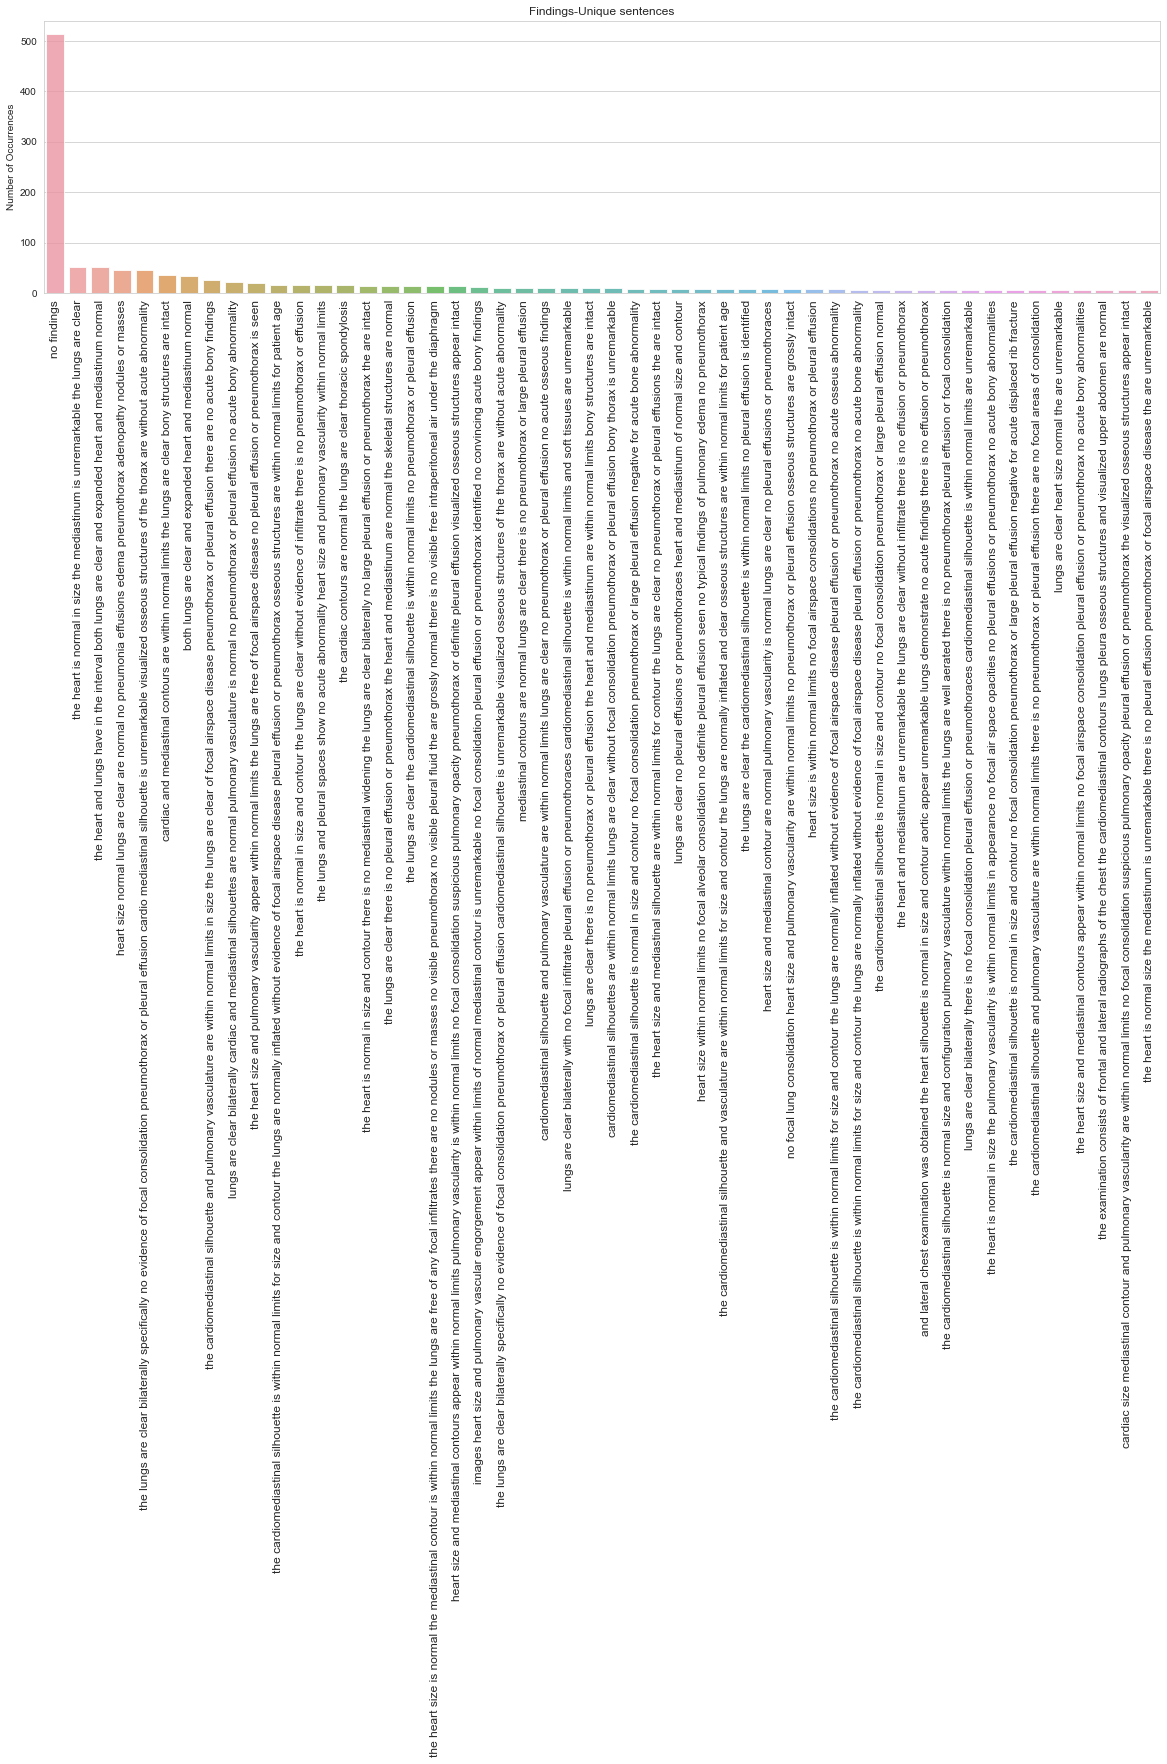

In [78]:
#Plotting top 50 frequent sentences of Findings feature
sentences = dataframe['findings'].value_counts()[:50]
plt.figure(figsize=(20,5))
sns.barplot(sentences.index, sentences.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xticks(fontsize='large',rotation=90)
plt.title("Findings-Unique sentences")
plt.show()

In [81]:
dataframe.shape

(3851, 10)